In [8]:
import math
from mpl_toolkits import mplot3d
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import animation

In [9]:
def f(x,y):
    return np.sqrt((10 - x)**2 + ( 0 - y)**2) #euclidean distance to exit 

In [10]:
#Creation of the Room environment as was done by Baglietto & Parisi (2011)

x = np.linspace(0,20,20)
y = np.linspace(0,20,20)

X,Y = np.array(np.meshgrid(x,y))
z = f(X,Y)

#Exit location 
#note that here the exit coordinates are already given. 
x_exit = 10.
y_exit = 0.

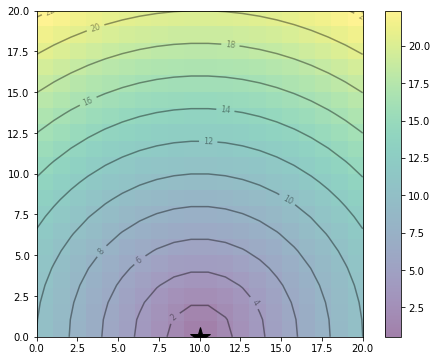

In [11]:
#Plot the room environment with the exit point marked. 
#The contour shows the distance to the exit point

plt.figure(figsize=(8,6))
plt.imshow(z, extent=[0, 20, 0, 20], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_exit], [y_exit], marker='*', markersize=20, color="black")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
plt.show()

In [12]:
#optimization function for the PSO. Here it is defined as euclidean distance to the exit point


def particle_initialisation(n_particles):
    """First initialisation of the particles. 
    input: number of particles the algorithm runs on (int)
    returns: Location of particle (2xn_particles) and Velocity of particles (2 x n_particles)"""
    Xloc = np.random.rand(2, n_particles) * 20 #personal best initially
    V = np.random.randn(2, n_particles) * 0.1 
    print(f"this is the velocity shape {V.shape}")
    it = 0

    pbest = Xloc
    pbest_obj = f(Xloc[0], Xloc[1])             #personal best objective initially
    gbest = pbest[:, pbest_obj.argmin()]        #global best initially
    gbest_obj = pbest_obj.min()                 #global best objective initially
    return Xloc, pbest, V, pbest_obj, gbest, gbest_obj


def evacuated(Xloc, V, pbest, pbest_obj):
    #making sure evacuated particles are out of room
    checks, = np.where(np.logical_and(np.logical_or(Xloc[0]<=9.4, Xloc[0]>=10.6), Xloc[1]>0.1))

    Xloc = Xloc[:,checks]
    V = V[:, checks]
    pbest = pbest[:,checks]
    pbest_obj = pbest_obj[checks]

    return Xloc, V, pbest, pbest_obj

def plot(it, x_exit, y_exit, pbest, V):
    plt.figure(figsize=(8,6))
    plt.imshow(z, extent=[0, 20, 0, 20], origin='lower', cmap='viridis', alpha=0.5)
    plt.colorbar()
    plt.plot([x_exit], [y_exit], marker='*', markersize=20, color="black")
    contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
    plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
    plt.quiver(pbest[0], pbest[1], V[0], V[1]) 
    plt.savefig(f'{it}.png')
    plt.show()

def iteration(av_speed, density, x_exit, y_exit, Xloc, V, pbest, pbest_obj, gbest, it):

    plot(it, x_exit, y_exit, pbest, V)

    Xloc, V, pbest, pbest_obj = evacuated(Xloc, V, pbest, pbest_obj)

    V = w*V + c1*r1*(pbest - Xloc) + c2*r2*(gbest.reshape(-1,1) - Xloc) #velocity function -- social behaviour component
    V = V/np.sqrt(V[0]**2 + V[1]**2) #vector normalisation
    Speed = np.sqrt(V[0] ** 2 + V[1] ** 2 ) 
    av_speed.append(sum(np.array(Speed))/len(np.array(Speed)))
    density.append(len(np.array(Speed))/400)
    print(f"This is the speed matrix shape (should be 1,300) = {Speed.shape}")
    Xloc = Xloc + V


    obj = f(Xloc[0], Xloc[1])

    pbest[:, (pbest_obj >= obj)] = Xloc[:, (pbest_obj >= obj)]

    pbest_obj = np.array([pbest_obj, obj]).max(axis = 0)
    if len(pbest_obj) > 1: 
        gbest = pbest[:, pbest_obj.argmin()]
    else: 
        gbest = pbest
    gbest_obj = pbest_obj.min() 
    it += 1

    if len(pbest_obj) != 0:
        iteration(av_speed, density, x_exit, y_exit, Xloc, V, pbest, pbest_obj, gbest, it)
    else: 
        print(f"Everyone is evacuated!")
    return av_speed, density




In [13]:

def PSO(n_par,x_exit = 10., y_exit = 0.):

    #initialise parameters:
    av_speed = []
    density = []


    Xloc, pbest, V, pbest_obj, gbest, gbest_obj = particle_initialisation(n_par)

    av_speed, density = iteration([],[],x_exit, y_exit, Xloc, V, pbest, pbest_obj, gbest, 0)
    plt.plot(av_speed, density)



this is the velocity shape (2, 300)


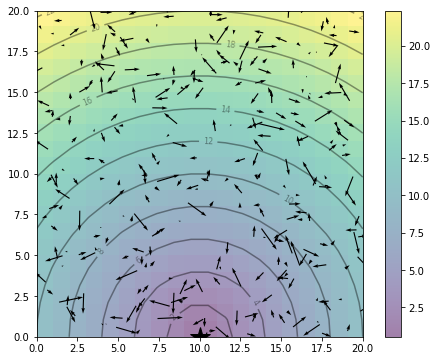

This is the speed matrix shape (should be 1,300) = (283,)


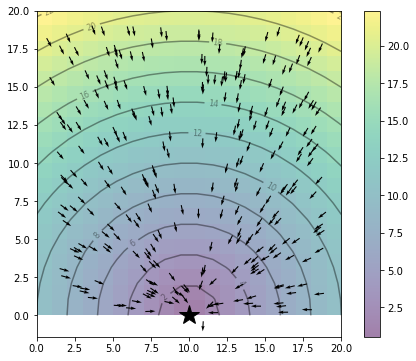

This is the speed matrix shape (should be 1,300) = (278,)


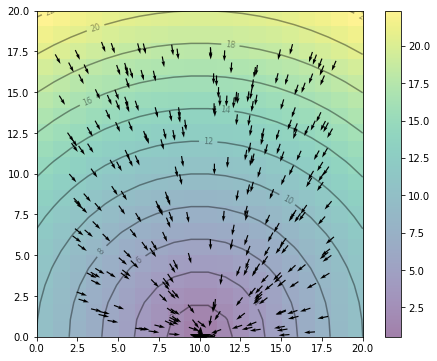

This is the speed matrix shape (should be 1,300) = (274,)


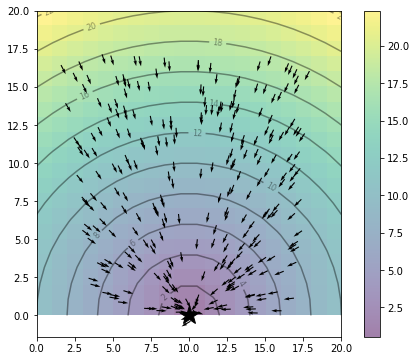

This is the speed matrix shape (should be 1,300) = (264,)


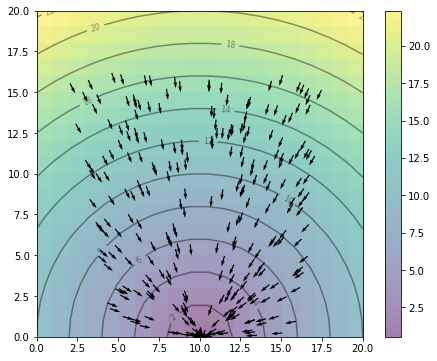

This is the speed matrix shape (should be 1,300) = (251,)


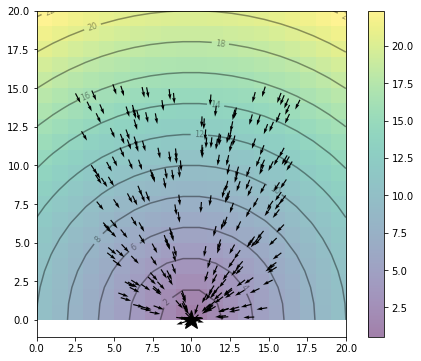

This is the speed matrix shape (should be 1,300) = (237,)


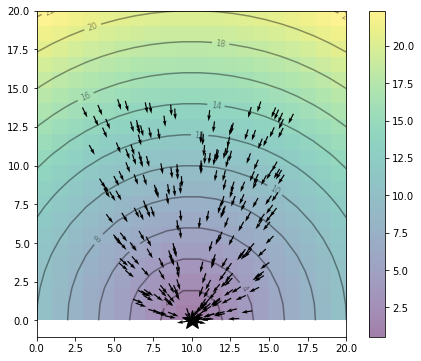

This is the speed matrix shape (should be 1,300) = (227,)


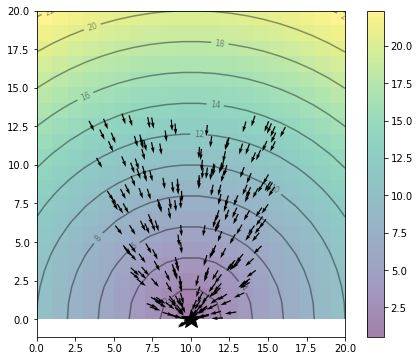

This is the speed matrix shape (should be 1,300) = (205,)


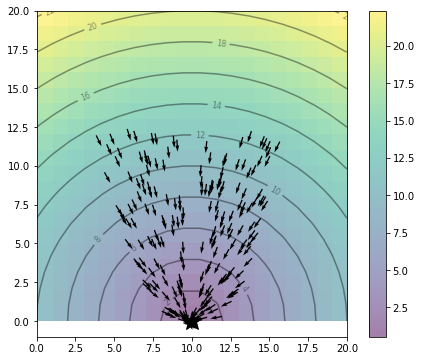

This is the speed matrix shape (should be 1,300) = (182,)


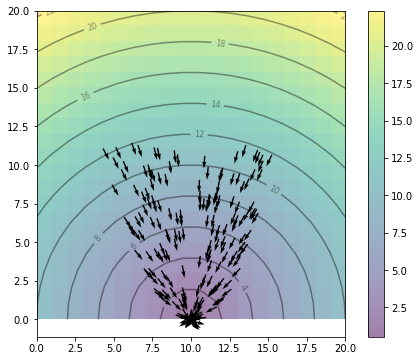

This is the speed matrix shape (should be 1,300) = (158,)


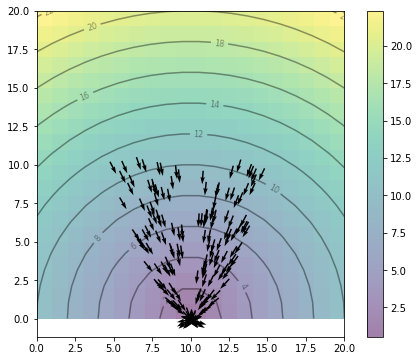

This is the speed matrix shape (should be 1,300) = (140,)


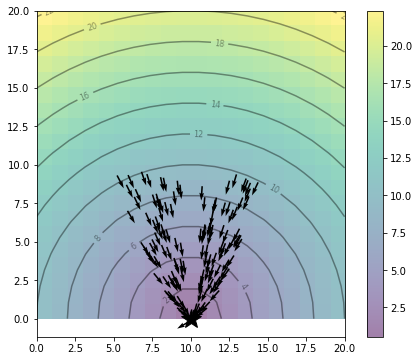

This is the speed matrix shape (should be 1,300) = (125,)


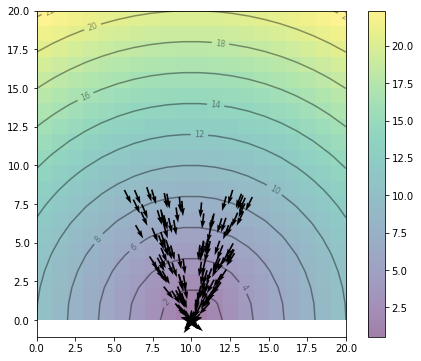

This is the speed matrix shape (should be 1,300) = (109,)


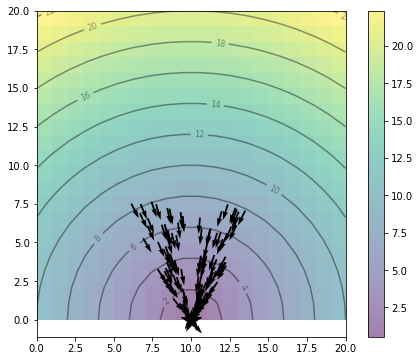

This is the speed matrix shape (should be 1,300) = (87,)


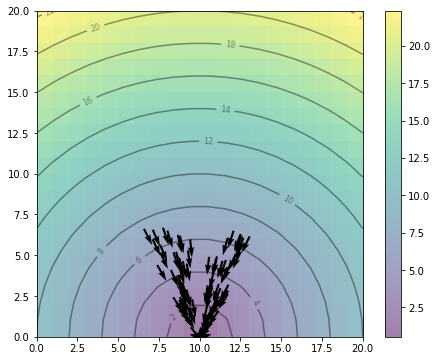

This is the speed matrix shape (should be 1,300) = (71,)


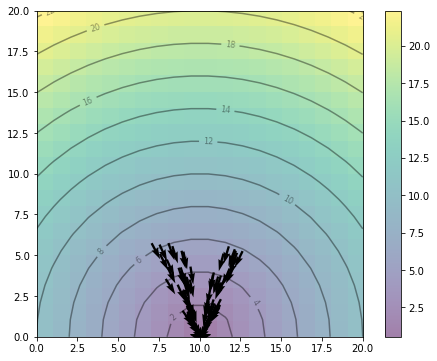

This is the speed matrix shape (should be 1,300) = (55,)


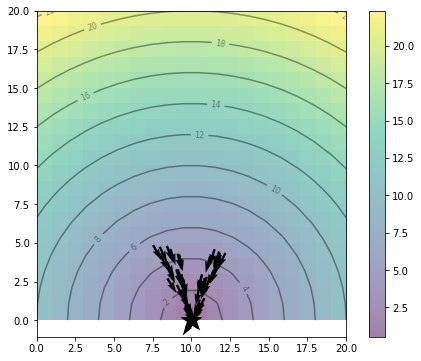

This is the speed matrix shape (should be 1,300) = (37,)


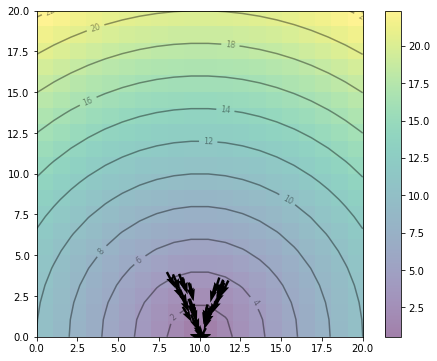

This is the speed matrix shape (should be 1,300) = (22,)


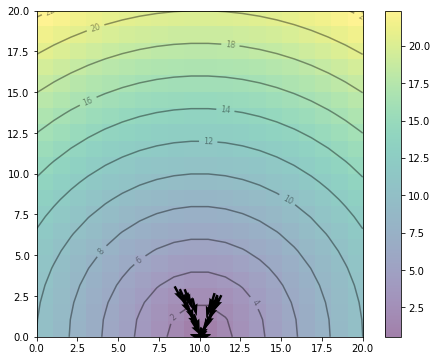

This is the speed matrix shape (should be 1,300) = (16,)


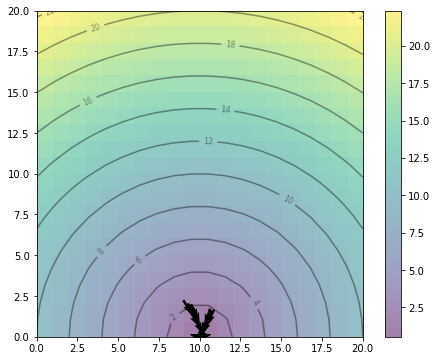

This is the speed matrix shape (should be 1,300) = (7,)


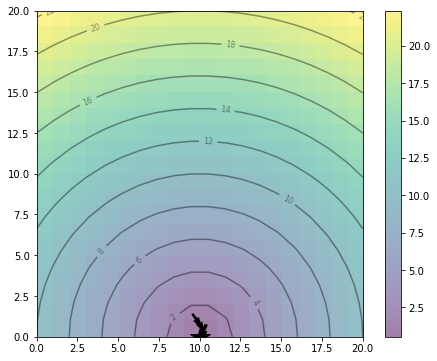

ZeroDivisionError: division by zero

In [14]:
#Initialize parameters used in PSO
k =  1 # time interval
w = 0.5 + 1/(2*np.log(k) + 1) # 0.1
c1 = 3# 0.1
c2 = 2 # 0.1
r1 = np.random.rand()
r2 = np.random.rand()


PSO(300, 10., 0.)

In [ ]:
def average_vel: 
    